# Ship or no Ship
This notebook contains a Convolutional Neural Net trained to detect whether a given image has, or does not have, a ship.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = plt.imread('../data/ship_no_ship/test/ship/0123b84ee.jpg')

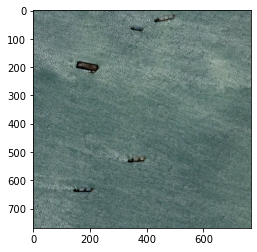

In [3]:
plt.imshow(img)

## Create training and test sets

In [4]:
train_gen = ImageDataGenerator(rescale = 1/255.)
test_gen = ImageDataGenerator(rescale = 1/255.)
train_images = train_gen.flow_from_directory(
    '../data/ship_no_ship/train/',
    class_mode = 'binary',
    batch_size = 8,
    target_size = (768, 768)
)
test_images = train_gen.flow_from_directory(
    '../data/ship_no_ship/test/',
    class_mode = 'binary',
    batch_size = 8,
    target_size = (768, 768)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
train_images.class_indices

{'noship': 0, 'ship': 1}

## Define the model

In [6]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()

#model.add(Conv2D(32, (3, 3), activation = 'relu'))
#model.add(MaxPool2D())

#model.add(Conv2D(32, (3, 3), activation = 'relu'))
#model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
early_stop = EarlyStopping(patience=5, monitor = 'val_accuracy')

## Fit the model

In [9]:
history = model.fit(train_images, 
                    epochs = 10, 
                    validation_data=test_images,
                    callbacks=[early_stop])

Epoch 1/10
250/250 [==============================] - 2235s 9s/step - loss: 43.0415 - accuracy: 0.5669 - val_loss: 0.6928 - val_accuracy: 0.5860
Epoch 2/10
250/250 [==============================] - 2458s 10s/step - loss: 1.0993 - accuracy: 0.5857 - val_loss: 0.9160 - val_accuracy: 0.6500
Epoch 3/10
250/250 [==============================] - 2077s 8s/step - loss: 0.9774 - accuracy: 0.6495 - val_loss: 0.7087 - val_accuracy: 0.6050
Epoch 4/10
250/250 [==============================] - 1987s 8s/step - loss: 0.7164 - accuracy: 0.6782 - val_loss: 0.7041 - val_accuracy: 0.6220
Epoch 5/10
250/250 [==============================] - 2011s 8s/step - loss: 0.9173 - accuracy: 0.6927 - val_loss: 0.6897 - val_accuracy: 0.6140
Epoch 6/10
250/250 [==============================] - 2039s 8s/step - loss: 0.7061 - accuracy: 0.7314 - val_loss: 0.7221 - val_accuracy: 0.6080
Epoch 7/10
250/250 [==============================] - 1973s 8s/step - loss: 0.6648 - accuracy: 0.7683 - val_loss: 1.0312 - val_accurac

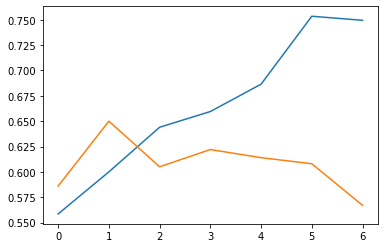

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.save('ship-no-ship-model-1.h5')